In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
import math

In [43]:
df = pd.read_csv("matches.csv")
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
1,2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
2,3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
3,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
4,5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1.0,2.0,...,Match Report,NaN,12.0,3.0,16.9,1.0,0.0,0.0,2020,Norwich City
2717,39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0.0,4.0,...,Match Report,NaN,11.0,2.0,19.8,1.0,0.0,0.0,2020,Norwich City
2718,40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0.0,1.0,...,Match Report,NaN,2.0,0.0,20.6,0.0,0.0,0.0,2020,Norwich City
2719,41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0.0,2.0,...,Match Report,NaN,6.0,2.0,13.4,0.0,0.0,0.0,2020,Norwich City


# **BAR CHART**

In [44]:
# xử lý dữ liệu tính total các formation được áp dụng
formation_result = df[["formation", "result"]]
formation_result = formation_result.groupby(["formation", "result"])['result'].count().reset_index(name="count")
filter_formation_result = formation_result.groupby(['formation'])['count'].sum().reset_index(name='total')

,formation,total
0,3-1-4-2,16
1,3-2-4-1,4
2,3-3-3-1,12
3,3-4-1-2,69
4,3-4-3,315
5,3-4-3◆,1
6,3-5-1-1,8
7,3-5-2,183
8,4-1-2-1-2◆,26
9,4-1-3-2,1


In [45]:
# xử lý dữ liệu lọc ra các formation có số trận áp dụng >= 20, và tính phần trăm tỷ lệ thắng thua
filter_formation_result = filter_formation_result[filter_formation_result['total'] >= 20]
filter_formation_result = filter_formation_result['formation']
formation_result["%"] = 100 * formation_result["count"]/formation_result.groupby("formation")["count"].transform('sum')
formation_result = formation_result.pivot(index="formation", columns="result", values="%").fillna(0).reset_index().rename_axis(None, axis = 1)
formation_result = formation_result[formation_result['formation'].isin(filter_formation_result)]

,formation,D,L,W
3,3-4-1-2,26.086957,42.028986,31.884058
4,3-4-3,25.714286,33.333333,40.952381
7,3-5-2,21.857923,49.726776,28.415301
8,4-1-2-1-2◆,26.923077,46.153846,26.923077
10,4-1-4-1,24.840764,45.859873,29.299363
11,4-2-2-2,23.809524,38.095238,38.095238
12,4-2-3-1,21.902017,35.878963,42.219020
13,4-3-1-2,26.470588,35.294118,38.235294
15,4-3-3,21.723519,28.366248,49.910233
16,4-4-1-1,11.267606,56.338028,32.394366


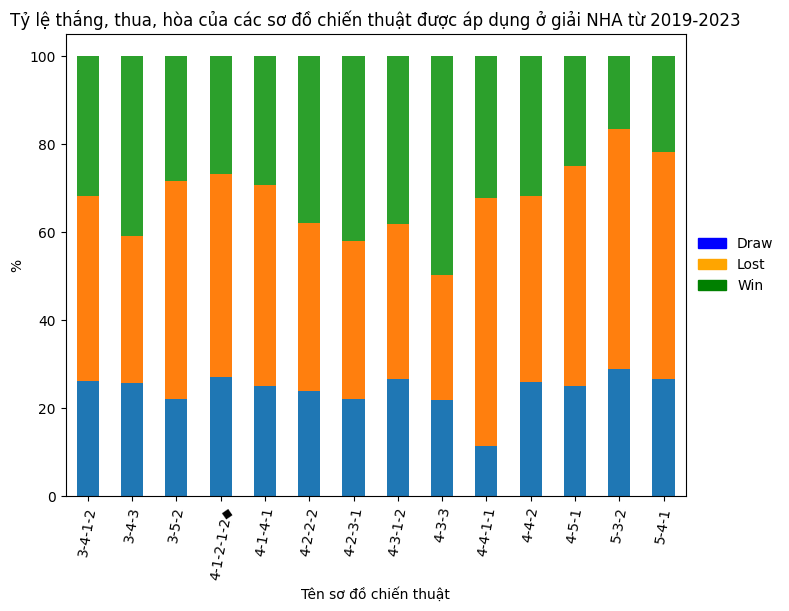

In [46]:
# vẽ biểu đồ
ax = formation_result.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)
default_x_ticks = range(len(formation_result))
plt.xticks(default_x_ticks, formation_result['formation'], rotation=80)
plt.xlabel("Tên sơ đồ chiến thuật")
plt.ylabel("%")
plt.title("Tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật được áp dụng ở giải NHA từ 2019-2023")
top_bar = mpatches.Patch(color='blue', label='Draw')
middle_bar = mpatches.Patch(color='orange', label='Lost')
bottom_bar = mpatches.Patch(color='green', label='Win')
plt.legend(handles=[top_bar, middle_bar, bottom_bar], loc = "center left", frameon=False, bbox_to_anchor=(1, 0.5))


### Các trường dữ liệu tương tác
- formation
- result
### Xử lý dữ liệu
* gom nhóm các sơ đồ chiến thuật và result -> đếm các dòng
* lọc ra có sơ đồ chiến thuật mà có số trận áp dụng ít hơn 20 
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này
* Chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả tính phần trăm ở bước đã tính trước đó
### Giải thích biểu đồ
Với mỗi sơ đồ chiến thuật mà các huấn luyện viên áp dụng trên biểu đồ, chiều dài tổng thể trên thang đo 100% và được chia làm 3 phần tương ứng với 3 màu khác nhau để biểu thị cho tỷ lệ thắng, hòa, thua của các sơ đồ chiến thuật. Phần tô màu xanh biểu diễn cho tỷ lệ hòa, màu cam biểu diễn cho tỷ lệ thua và phần màu xanh biểu diễn cho tỷ lệ thắng. 
### lý do chọn biểu đồ ***Stacked bar chart***
Biểu đồ cột chồng rất hữu ích cho việc so sánh. Dựa vào biểu đồ, ta dễ dàng quan sát để biết tỷ lệ thành phần nào chiếm tỷ lệ cao và thấp. Đồng thời cho thấy rõ tỷ lệ thắng, thua, hòa của các sơ đồ chiến thuật. Điều này giúp ích rất nhiều cho việc so sánh các sơ đồ chiến thuật với nhau. Từ đó cho thấy sơ đồ chiến thuật nào đang mang lại hiệu quả thắng lợi cao khi được áp dụng (không xét đến các yếu tố cầu thủ).
### Phân tích kết quả từ biểu đồ
* tỷ lệ thằng, thua, hòa được hiển thị rõ rệt. Trong đó sơ đồ chiến thuật nào có màu xanh lá chiếm càng nhiều thì tỷ lệ thắng khi áp dụng sơ đồ chiến thuật đó càng cao (không tính các yếu tố khác tác động vào như cầu thủ, ...). Sơ đồ nào màu vàng chiếm diện tích càng nhiều thì khi áp dụng sơ đồ chiến thuật thì tỷ lệ thua càng cao.
* Dựa vào sơ đồ ta có thẻ thấy sơ đồ 4-4-1-1 khi áp dụng thì tỷ lệ thua cực kỳ cao và cao nhất trong các sơ đồ trên, còn sơ đồ 4-3-3 khi áp dụng tỷ lệ thằng cao nhất.
* Từ đó, ta thấy sơ đồ chiến thuật 4-3-3 được áp dụng rất nhiều xuyên suốt từ 2019-2023 với 557 lần áp dụng, còn sơ đồ chiến thuật 4-4-1-1 chỉ được áp dụng vỏn vẹn 71 lần

In [47]:
# xử lý dữ liệu lọc dữ liệu các đội bóng thuộc bigsix, tính tổng số trận thắng thua hòa
team_big_6 = ['Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur']
team_result = df[df['team'].isin(team_big_6)]
team_result = team_result[['team', 'result']]
team_result = team_result.groupby(['team', 'result'])['result'].count().reset_index(name="count")
team_result = team_result.pivot(index="team", columns="result", values="count").fillna(0).reset_index().rename_axis(None, axis = 1)

,team,D,L,W
0,Arsenal,27,38,70
1,Chelsea,34,34,68
2,Liverpool,25,21,89
3,Manchester City,17,22,98
4,Manchester United,37,31,69
5,Tottenham Hotspur,27,42,68


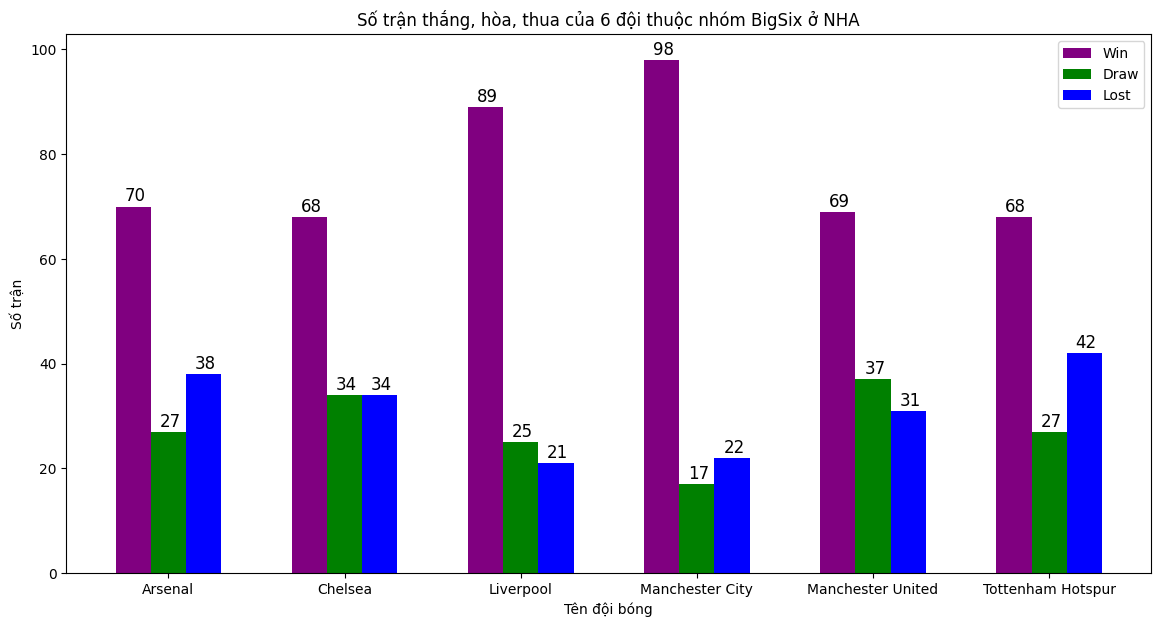

In [48]:
# vẽ biểu đồ
X_axis = np.arange(len(team_result.index))
plt.figure(figsize=(14, 7))  # thiết lập size cho bảng
plt.bar(X_axis - 0.2, team_result['W'], 0.2, label='Win', color='purple')
plt.bar(X_axis, team_result['D'], 0.2, label='Draw', color='green')
plt.bar(X_axis + 0.2, team_result['L'], 0.2, label='Lost', color='blue')
plt.xticks(X_axis, team_result['team'])
plt.title("Số trận thắng, hòa, thua của 6 đội thuộc nhóm BigSix ở NHA")
plt.xlabel("Tên đội bóng")
plt.ylabel("Số trận")

for index, data in enumerate(team_result["W"]):
    plt.text(x=index - 0.25, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["D"]):
    plt.text(x=index - 0.05, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

for index, data in enumerate(team_result["L"]):
    plt.text(x=index + 0.15, y=data + 1,
             s=f"{data}", fontdict=dict(fontsize=12))

plt.legend()


### Các trường dữ liệu tương tác
- team
- result
### Xử lý dữ liệu
* Lọc dữ liệu ở trường team lấy những dòng nào có dữ liệu thuộc nhóm big six của ngoại hạng anh ('Manchester City', 'Manchester United', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur')
* Từ result tính tổng các trận thắng, hòa, thua -> chuyển result với 3 mẫu dữ liệu "W", "D", "L" thành 3 columns cùng với kết quả đã tính trước đó
* Từ kết quả ở 3 columns ta tính phần trăm: giá trị tại column / tổng sô trận tham gia => thay thế giá trị hiện tại bằng giá trị phần trăm mới này
### Giải thích biểu đồ
Trục x biểu diện tổng số trận đấu các đội bóng đã chơi (từ năm 2019-2023(vẫn còn đang cập nhật)), trục y biểu diễn cho tên các đội bóng nằm trong nhóm big six của ngoại hạng anh. Mội đội sẽ được biểu diễn 3 cột dữ liệu để tượng trưng cho số trận thắng, thua, hòa của mỗi đội. Cột màu tím biểu diễn số trận thắng, cột màu xanh lá biểu diễn cho số trận hòa, cột màu xanh dương biểu diễn cho số trận thua. 
### lý do chọn biểu đồ ***Multiple bar chart***
Biểu đồ nhiều cột giúp ích cho việc so sánh các trường dữ liệu. Dựa vào biểu đồ ta dễ dạng biết được đội bóng có số trận thắng, thua, hòa là bao nhiêu. Đồng thời quan sát được sự chênh lệch về độ cao của các cột dữ liệu, điều này rất hữu ích cho việc so sánh các đội bóng với nhau  trên cùng một trường dữ liệu. Từ đó cho thấy đội bóng nào đã và đang thể hiện bộ mặt tích cực (nhờ số trận thắng) và đội bóng nào đang thể hiện bộ mặt bết bát (nhờ số trận thua).
### Phân tích kết quả từ biểu đồ
* Từ biểu độ ta thấy sự chênh lệch rõ ràng về số trận thằng, thua và hòa của các đội bóng thuộc big six. Cột thằng (màu tím) càng cao thì thể hiện đội bóng càng mạnh trong giai đoạn (2019-2023), cột xanh nước biển càng cao thì thể hiện đội bóng càng yếu trong giai đoạn (2019-2023)
* Qua biểu đồ, ta có thể thấy Manchester City áp đảo với 98 trận thắng và chỉ vỏn vẹn 22 trận thua (gần như thấp nhất chỉ sau Liverpool). Còn Tottenham Hotspur có cột thua cao nhất (không quá chênh lệch nhiều).
* Từ đó, ta thấy trong giai đoạn 2019-2023 ở ngoại hạng anh, Manchester City là đội mạnh nhất có các chỉ số thằng, thua, hòa đều vượt trội so với phần còn lại.

# **Biểu đồ Heatmap biểu diễn hệ số tương quan giữa các thông số**
# Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt
# Xử lý dữ liệu
- Trích xuất các thuộc tính kiểu số ( numeric ) và trong đó bỏ đi một số thuộc tính không cần thiết như thuộc tính ghi chú, số thứ tự và năm mùa giải.
# Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [49]:
def heatmap_first(df):
    df = df.drop(['notes','Unnamed: 0','season'], axis=1)
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
    plt.title("So sánh hệ số tương quan giữa các thông số", fontsize= 40)
    plt.show()

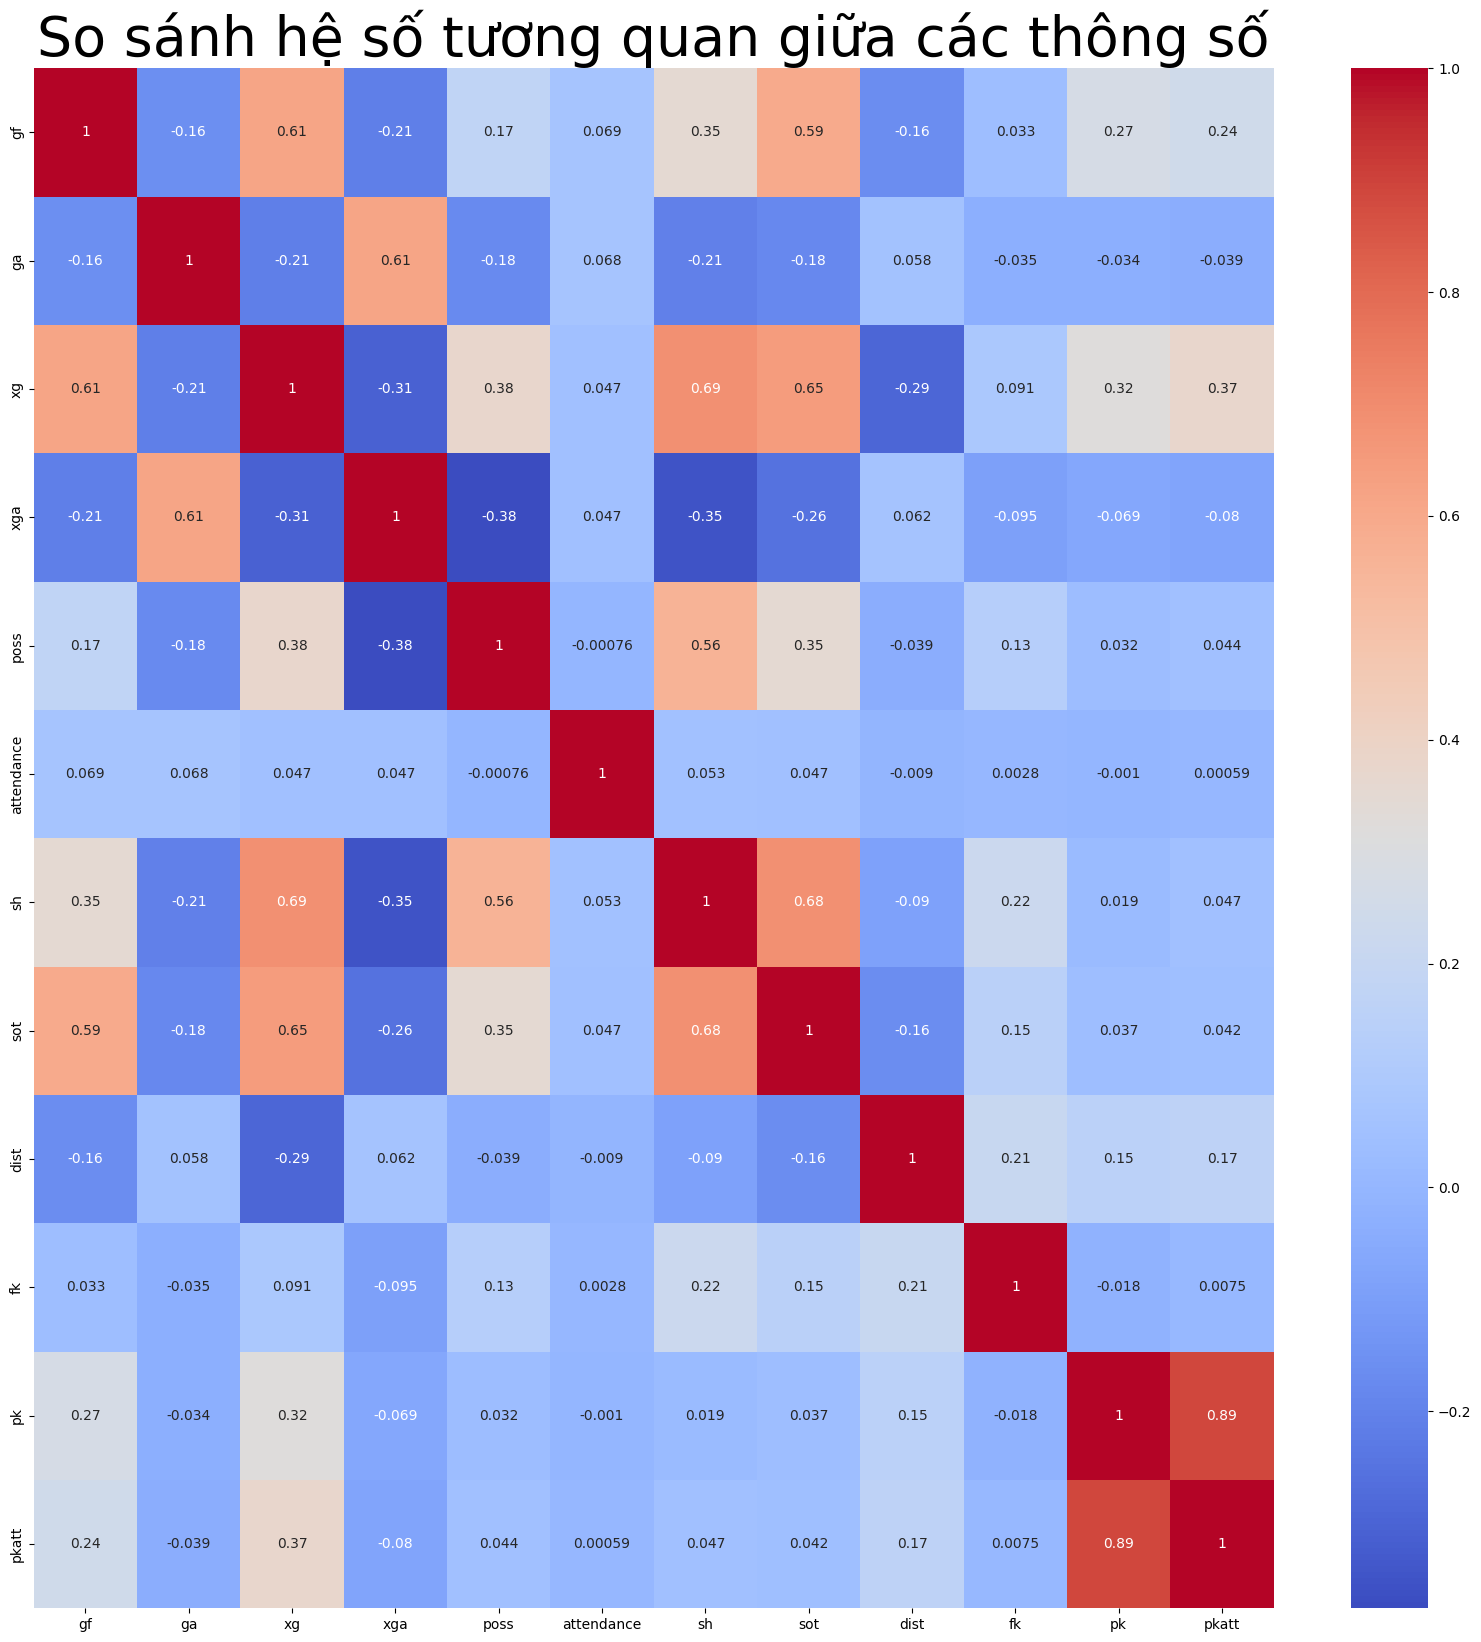

In [50]:
heatmap_first(df)

# Phân tích kết quả của biểu đồ 
- Giá trị của mỗi hệ số tương quan sẽ nằm trong [-1, 1]. Trong đó khi giá trị càng gần về -1 hoặc 1 thì mối quan hệ giữa các biến số càng mạnh. Giá trị gần 0 thì cho thấy sự độc lập giữa các biến số.
- Ví dụ khi giá trị gần về 1 sẽ cho thấy sự tích cực mạnh giữa 2 thuộc tính ( giá trị của thuộc tính này tăng thì thuộc tính kia cũng tăng ), khi gần về -1 sẽ tiêu cực mạnh ( giá trị thuộc tính này tăng thì giá trị thuộc tính kia giảm ).
- Thuộc tính pk và pkatt có mối quan hệ mạnh nhất.
- Mối quan hệ giữa thuộc tính attendance với bất kì các thuộc tính khác đều cho thấy sự độc lập cao.

# **Biểu đồ Heatmap so sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median**

# Các trường dữ liệu tương tác
- gf, ga, xg, xga, poss, attendance, sh, sot, dist, fk, pk, pkatt, team, result
# Xử lý dữ liệu
- Gom nhóm các thông số theo từng đội.
- Sử dụng phương pháp min-max để chuẩn hóa các giá trị của các dữ liệu số.
- Với từng đội, các giá trị của một chỉ số ( trừ result ) được thu thập qua từng trận sẽ tìm mean và median và thông qua hệ số lệch skewness để chọn ra giá trị mean hay median sẽ làm giá trị đại diện cho chỉ số đó.
- Bỏ qua các giá trị trống của dữ liệu khi tính mean hoặc median.
- Riêng thuộc tính result, giữ lại các giá trị 'W'.
# Mục tiêu khi chọn biểu đồ heatmap để trực quan 
- So sánh hệ số tương quan giữa 2 thuộc tính để trực quan hóa và cho biết mức độ liên quan giữa các biến số.
- Đưa ra những quyết định liên quan đến phân tích số liệu.
- Hữu ích trong việc giải thích các mô hình dự đoán, thực hiện kiểm định giả thuyết, và đưa ra các quyết định.

In [51]:
def findSkewnessBasedOnPearson(mean,median, standard_deviation):
    skewness = 3*(mean-median)/standard_deviation
    return skewness

def chooseMeanOrMedian(skewness):
    if math.fabs(skewness) < 0.5:
        return 'mean'
    return 'median'

In [52]:
def preprocessing_data(df):
    list_of_teams = df['team'].unique()
    list_of_attributes = ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt']
    df = df.loc[:, ['gf','ga','xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt', 'team', 'result']]
    df_norm = df[list_of_attributes]
    df_norm = (df_norm - df_norm.min())/(df_norm.max()-df_norm.min())

    df[list_of_attributes] = df_norm

    data = {team: {attribute: -1 for attribute in list_of_attributes} for team in list_of_teams}
    for team in list_of_teams:
        data[team]['result'] = -1
    for attribute in list_of_attributes:
        value_group_by_team = df.groupby('team')[attribute].apply(list)
        mean_s = value_group_by_team.apply(lambda x: np.nanmean(x))
        median_s = value_group_by_team.apply(lambda x: np.nanmedian(x))
        std_s = value_group_by_team.apply(lambda x: np.nanstd(x))
        value = {team: 0 for team in list_of_teams}
        for team in list_of_teams:
            skewness = findSkewnessBasedOnPearson(mean_s[team],median_s[team], std_s[team])
            option = chooseMeanOrMedian(skewness)
            if option == 'mean':
                value[team] = mean_s[team]
            else:
                value[team] = median_s[team]
        if len(set(value.values())) > 2:
            for team in list_of_teams:
                data[team][attribute] = value[team]
        else:
            for team in list_of_teams:
                del data[team][attribute]
    
    #xử lý cột result 
    win_result = {team: 0 for team in list_of_teams}
    value_group_by_team = df.groupby('team')['result'].apply(list)
    for team in list_of_teams:
        win_result[team] = value_group_by_team[team].count('W')
    
    min_win_value = min(win_result.values())
    max_win_value = max(win_result.values())
    for team in list_of_teams:
        data[team]['result'] = (win_result[team] - min_win_value)/(max_win_value-min_win_value)
    return data


In [53]:
def heatmap_second(data):    
    dt = pd.DataFrame.from_dict(data, orient='index')
    df_tall = dt.reset_index().melt(id_vars=['index'], var_name='Index', value_name='Value')
    df_tall = df_tall.rename(columns={'index': 'Team'})

    # Vẽ biểu đồ nhiệt
    plt.figure(figsize=(10, 10))
    plt.title("So sánh thông số giữa các đội dựa vào chọn giá trị đại diện Mean hoặc Median", fontsize=20)
    sns.heatmap(df_tall.pivot(index='Team', columns='Index', values='Value'), annot=True, cmap="coolwarm")
    plt.show()

In [54]:
data = preprocessing_data(df)

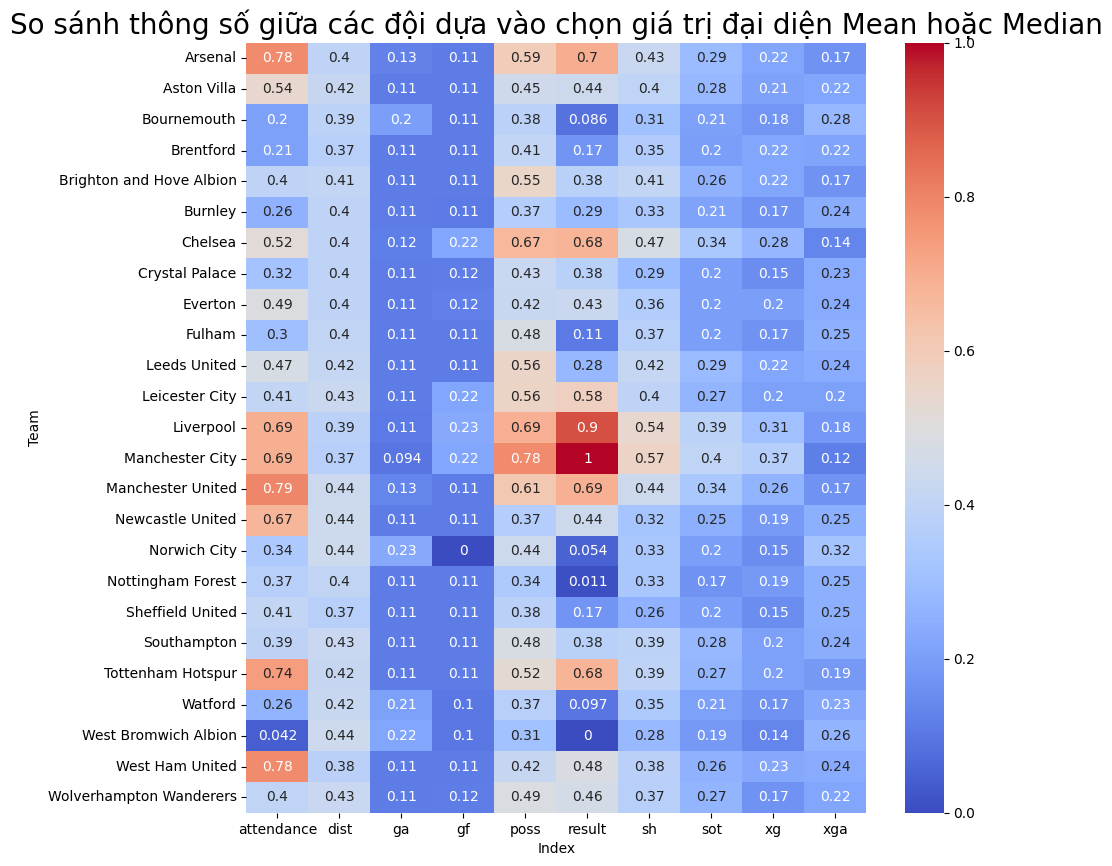

In [55]:
heatmap_second(data)

# Phân tích kết quả của biểu đồ
- Giá trị của mỗi chỉ số của 1 đội sẽ từ 0 đến 1. Trong đó giá trị tiến về 0 thì chỉ số càng thấp, giá trị tiến về 1 chỉ số càng vượt trội so với các đội khác.
- Dựa vào ngữ nghĩa mục tiêu khi vẽ biểu đồ, ta thấy đội Manchester City chiếm nhiều chỉ số trên sân vượt trội nhất với 4 trên 9 chỉ số ( poss, sh, sot, xg ).
- Từ đó ta thấy phần nào hợp lý khi đội Manchester City có số trận thắng nhiều nhất trong các đội. 

# **PIE CHART**

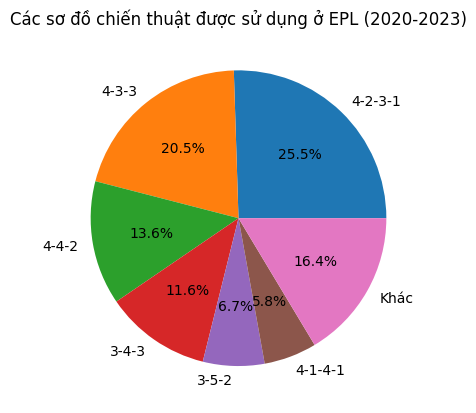

In [56]:

# Đếm số lượng dòng tương ứng với số trận
total = df.shape[0]

# Đếm số lượng mẫu cho từng giá trị của cột "formation"
counts = df["formation"].value_counts()

# Gom các phần có số lần xuất hiện bé hơn 3%
others = counts[counts/total <0.03].sum()
counts = counts[counts/total >=0.03]
counts['Khác'] = others


# Vẽ pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Thêm tiêu đề cho biểu đồ
plt.title("Các sơ đồ chiến thuật được sử dụng ở EPL (2020-2023)")

# Hiển thị biểu đồ
plt.show()

<h3> Trường dữ liệu </h3>
<ul>
    <li>formation</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Tính phần trăm của mỗi giá trị formation so với tổng số trận đấu</li>
</ul>

<h3> Phân tích, khám phá </h3>
 - Biểu đồ thể hiện tỉ lệ phần trăm các sơ đồ chiến thuật được sử dụng ở giải bóng đá Ngoại hạng Anh từ năm 2020 - 2023. Qua biểu đồ ta thấy được sơ đồ 4-2-3-1 được sử dụng nhiều nhất với 25.5%, ngay sau đó 4-4-3 (20.5%), 4-4-2 (13.6%) và 3-4-3 (11.6%). 4 sơ đồ này chiến tổng cộng đến hơn 70% điều này cho thấy rằng đây là 4 đội hình phổ biến nhất hiện tại và được đa số các đội ở Ngoại hạng Anh sử dụng. Các sơ đồ chiến thuật còn lại được sử dụng khá ít, có thể lý do là độ hiệu quả của các sơ đồ này trong môi trường Ngoại hạng Anh là không cao.
<h3> Lý do chọn biểu đồ tròn </h3>
<ul>
  <li>Biểu đồ tròn là một công cụ hữu ích để thể hiện tỷ lệ phần trăm của một loạt các mục khác nhau trong một trường dữ liệu. </li>
  <li>Cho thấy tỉ lệ phần trăm các sơ đồ chiến thuật sử dụng trong giải đấu</li>
  <li>Giúp cho người đọc có thể dễ dàng so sánh tỷ lệ phần trăm của các sơ đồ khác nhau </li>
  <li>Giúp cho các thông tin trở nên trực quan và dễ hiểu hơn so với việc đọc các con số trong một bảng dữ liệu</li>
</ul>



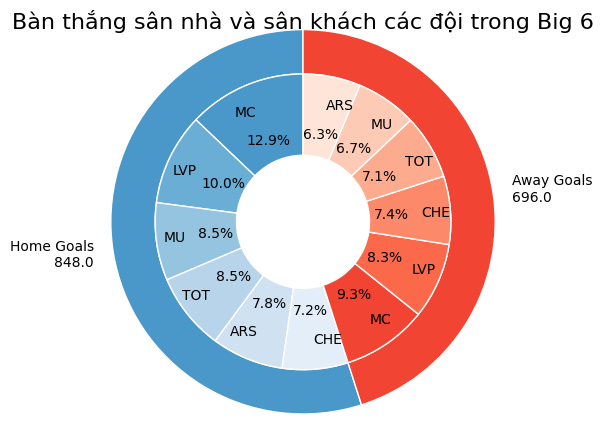

In [57]:
# lấy các cột venue, gf, team
subset_df = df.loc[:, ['venue', 'gf', 'team']]

#Lọc dữ liệu các team trong Big6
teams= ['Manchester City','Manchester United','Arsenal','Tottenham Hotspur','Chelsea','Liverpool'] #Các đội trong Big6
shortTeamNames = {'Manchester City':'MC','Manchester United':'MU','Arsenal':'ARS','Tottenham Hotspur':'TOT','Chelsea':'CHE','Liverpool':'LVP'} #Tên viết tắt các đội
df_filtered = subset_df.loc[subset_df['team'].isin(teams)]



# Đếm số bàn sân nhà sân khách các đội
df_grouped = df_filtered.groupby(['venue', 'team']).sum().reset_index()

# Chia ra sân nhà và sân khách sau đó sort theo số lượng bàn
df_home = df_grouped[df_grouped['venue'] == 'Home'].sort_values(by='gf', ascending=False)
df_away = df_grouped[df_grouped['venue'] == 'Away'].sort_values(by='gf', ascending=False)


# Tính tổng số bàn thắng sân nhà và sân khách
total_home_goals = df_home['gf'].sum()
total_away_goals = df_away['gf'].sum()


# Tạo nested pie chart
fig, ax = plt.subplots()

#Tạo colors
homeColor,awayColor = [plt.cm.Blues, plt.cm.Reds]
# Vẽ pie chart ngoài cùng (tổng số bàn thắng)
outer_labels = ['Home Goals\n{}'.format(total_home_goals),
                'Away Goals\n{}'.format(total_away_goals)]
outer_values = [total_home_goals, total_away_goals]
mypie,_=ax.pie(outer_values, radius=1.3, labels=outer_labels, colors=[homeColor(0.6), awayColor(0.6)],startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')



# Vẽ pie chart bên trong (số bàn thắng sân nhà và sân khách của từng đội)
inner_values = df_home['gf'].tolist() + df_away['gf'].tolist()
inner_labels = df_home['team'].tolist() + df_away['team'].tolist()
inner_labels = list(map(lambda x: shortTeamNames[x] if x in shortTeamNames else x, inner_labels)) #Đổi tên các đội thành tên viết tắt

mypie2 = ax.pie(inner_values, radius=1.3-0.3,  labeldistance=0.8, autopct='%1.1f%%',
labels=inner_labels,  colors=[homeColor(0.6),homeColor(0.5),homeColor(0.4),homeColor(0.3),homeColor(0.2),homeColor(0.1),awayColor(0.6),awayColor(0.5),awayColor(0.4),awayColor(0.3),awayColor(0.2),awayColor(0.1)],startangle=90)
plt.setp( mypie2[0], width=0.55, edgecolor='white')

# Thêm tiêu đề
ax.set_title('Bàn thắng sân nhà và sân khách các đội trong Big 6', fontsize=16)

# Hiển thị biểu đồ
plt.show()

<h3> Trường dữ liệu </h3>
<ul>
    <li>vue</li>
    <li>gf</li>
    </li>team</li>
</ul>
<h3> Xử lý dữ liệu </h3>
<ul>
    <li>Lọc ra các cột vue,gf,team từ dữ liệu</li>
    <li>Tiếp thục lọc theo các team thuộc nhóm big6 </li>
    <li>Đếm tổng số bàn sân nhà, sân khách </li>
    <li>Đếm số bàn sân nhà và sân khách từng đội</li>
    <li>Tính phần trăm bàn thắng sân nhà, sân khách </li>
    <li>Tính phần trăm bàn thăng sân nhà/sân khách của mỗi đội </li>
</ul>

<h3> Phân tích, khám phá </h3>
 - Biểu đồ này là một nested pie chart thể hiện số lượng bàn thắng được ghi được của các đội bóng trong Big 6 của Ngoại hạng Anh trên sân nhà và sân khách. Pie chart ngoài cùng thể hiện tổng số bàn thắng của cả sân nhà và sân khách của tất cả các đội. Pie chart bên trong thể hiện phân bố bàn thắng giữa sân nhà và sân khách của từng đội bóng. 
 - Từ biểu đồ ta có thể thấy tổng số bàn thắng trên sân nhà là cao hơn so với sân khách, điều này chứng tỏ sân nhà mang lại lợi thế lớn hơn nhiều cho các đội bóng. 
 - Manchester City là đội có số bàn thằng cao nhất ở cả sân nhà và sân khách, Liverpool cũng thứ 2 về thành tích ghi bản cả sân nhà và sân khách cho thấy 2 đội này có hàng công mạnh ghi bàn ổn định ở cả sân nhà và sân khách. Manchester United và Tottenham là đội có tổng số bàn thằng nằm giữa và số bàn sân khách ít hơn so với sân nhà. Chelsea là trường hợp đặc biệt khi số bàn thằng sân khách của họ lại nhiều hơn sân nhà. Arsenal có số bàn thắng khá thấp ở cả sân nhà và sân khách so với các đội khác chứng tỏ họ đang gặp vấn đề về đầu ra bàn thằng trong những năm gần đây.

<h3> Lý do chọn nested pie chart( biểu đồ tròn lồng nhau) </h3>
<ul>
  <li>Nested pie chart thường được dùng để phân cấp dữ liệu. Trong trường hợp này, số lượng bàn thắng sân nhà và sân khách của từng đội trong Big 6 có thể được xem như là phân cấp của tổng số bàn thắng của từng đội đó. Nested pie chart cho phép ta trực quan hóa được phân cấp này bằng cách đặt biểu đồ tròn bên trong biểu đồ tròn lớn hơn để biểu thị số lượng bàn thắng sân nhà và sân khách của từng đội. </li>
  <li>Dễ dàng nhìn thấy sự phân chia tỉ lệ bàn thắng các đội</li>
  <li>Biểu đồ nested pie chart này giúp người xem có thể dễ dàng so sánh số lượng bàn thắng sân nhà và sân khách của từng đội với tổng số bàn thắng và so sánh số bàn thắng các đội với nhau</li>
</ul>

# **SCATTER CHART**

Lý do chọn biểu đồ phân tán
- Biểu đồ implot (scatter plot with a fitted line) là một công cụ mạnh mẽ để hiển thị đồ thị tương quan giữa hai biến dữ liệu số. Nó kết hợp cả biểu đồ phân tán và đường hồi quy tuyến tính để trình bày tương quan giữa hai biến. 
- Sự phụ thuộc tuyến tính của một biến đối với biến đầu vào có thể được hiển thị bằng cách sử dụng đường hồi quy trên biểu đồ implot. Nếu đường hồi quy nghiêng lên, có nghĩa là sự phụ thuộc tuyến tính giữa hai biến tăng lên. Nếu nó nghiêng xuống, có nghĩa là sự phụ thuộc tuyến tính giảm. 

--> Vì vậy, biểu đồ implot được sử dụng để phân tích dữ liệu và trình bày kết quả phân tích dữ liệu cho người đọc một cách rõ ràng và dễ hiểu. Nó cũng là công cụ hữu ích để đưa ra dự đoán và giải thích tương quan giữa các biến số. 


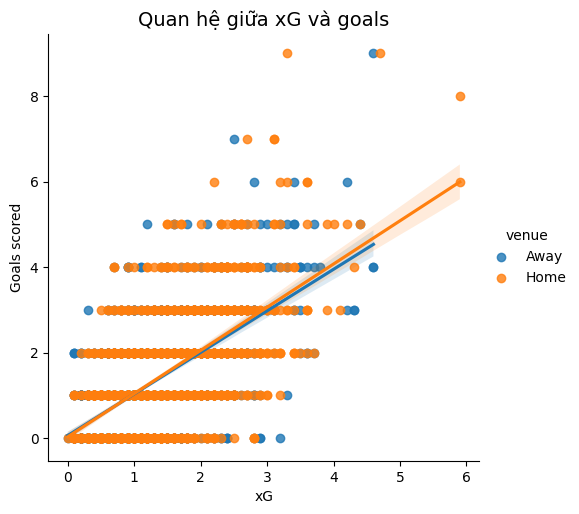

In [58]:
# Tạo biểu đồ scatterplot với đường trendline và phân biệt dữ liệu theo venue
sns.lmplot(x='xg', y='gf', hue='venue', data=df)

# Đặt tên cho trục x và y
plt.xlabel('xG')
plt.ylabel('Goals scored')
# Thêm tiêu đề cho biểu đồ
plt.title('Quan hệ giữa xG và goals', fontsize=14)

# Hiển thị biểu đồ
plt.show()

- Trường dữ liệu trực quan: xG, goals 

- Giải thích biểu đồ: Trục x biểu diện số bàn thắng được dự đoán trong một trận (từ năm 2019-2023(vẫn còn đang cập nhật)), trục y biểu diễn cho số bàn thắng thực tế của trận đấu đó. Chấm màu xanh là đội khách và chấm màu cam là đội nhà. 

- Nhận xét biểu đồ: Biểu đồ implot giữa xG và goals có thể cho thấy sự tương quan tích cực giữa hai biến, tức là khi giá trị xG tăng thì số bàn thắng cũng tăng. Đường trendline trong biểu đồ này có hướng tăng dần, cho thấy mối quan hệ giữa xG và số bàn thắng có xu hướng tăng cường. Tuy nhiên, độ dốc của đường trendline không phải là 1, tức là tỉ lệ giữa giá trị xG và số bàn thắng không luôn là 1:1. Điều này có thể do nhiều yếu tố khác nhau ảnh hưởng đến khả năng ghi bàn của các cầu thủ như chất lượng đối thủ, đội hình, điều kiện thi đấu, v.v. Biểu đồ cũng cho thấy phân bố chung của dữ liệu khá rải rác trên trục x và trục y, cho thấy sự đa dạng của dữ liệu và không có quá nhiều giá trị ngoại lệ. 

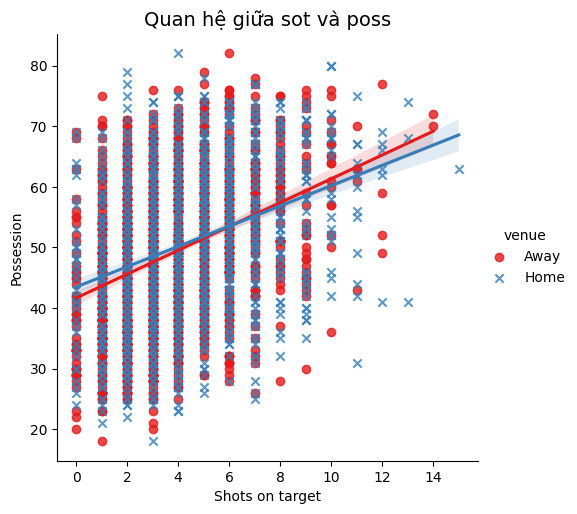

In [59]:
# Vẽ biểu đồ implot
sns.lmplot(x='sot', y='poss', data=df, hue='venue', markers=['o', 'x'], palette='Set1')

# Đặt tên cho trục x và y
plt.xlabel('Shots on target')
plt.ylabel('Possession')
plt.title('Quan hệ giữa sot và poss', fontsize=14)

# Hiển thị biểu đồ
plt.show()

- Trường dữ liệu trực quan: sot, poss 

- Giải thích biểu đồ: Trục x biểu diện số lượt sút trúng mục tiêu (từ năm 2019-2023(vẫn còn đang cập nhật)), trục y biểu diễn phần trăm kiểm soát bónǵ. Chấm màu đỏ là đội khách và dấu x là đội nhà. 

- Nhận xét biểu đồ: Biểu đồ implot giữa sot (shots on target) và poss (possession) cho thấy một mối tương quan dương mạnh giữa hai biến này. Cụ thể là khi possession càng cao thì số lượng shots on target cũng càng tăng. Tuy nhiên, cũng có một số điểm dữ liệu ngoại lệ (outlier) khi possession thấp nhưng số lượng shots on target lại cao và ngược lại. Do đó, để đánh giá chính xác hơn về mối tương quan giữa hai biến này, có thể cần phải xem xét thêm các yếu tố khác như chất lượng đội bóng, chiến thuật thi đấu, vị trí sân... 